## Clusterização Hieráquica
> https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

Avalie o algortimo de clusterização hieráquica aglomerativa para clusterizar os dados do dataset zoo.

#### Carreggue o dataset usando '\t' como separador

In [1]:
## code here
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn import datasets
from scipy.cluster.hierarchy import dendrogram
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

In [6]:
data = pd.read_csv('zoo.csv', sep='\t')

In [7]:
data.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type,name
0,no yes,no yes,no yes,no yes,no yes,no yes,no yes,no yes,no yes,no yes,no yes,no yes,discrete,no yes,no yes,no yes,discrete,string
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,class,meta
2,yes,no,no,yes,no,no,yes,yes,yes,yes,no,no,4,no,no,yes,mammal,aardvark
3,yes,no,no,yes,no,no,no,yes,yes,yes,no,no,4,yes,no,yes,mammal,antelope
4,no,no,yes,no,no,yes,yes,yes,yes,no,no,yes,0,yes,no,no,fish,bass


In [8]:
#descartando a linha 0 e 1 que aparentemente não estão sendo lidos da forma corrte, mas o restante do dataser está
data.drop([0,1], inplace=True)

In [9]:
data.shape

(100, 18)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 2 to 101
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   hair      100 non-null    object
 1   feathers  100 non-null    object
 2   eggs      100 non-null    object
 3   milk      100 non-null    object
 4   airborne  100 non-null    object
 5   aquatic   100 non-null    object
 6   predator  100 non-null    object
 7   toothed   100 non-null    object
 8   backbone  100 non-null    object
 9   breathes  100 non-null    object
 10  venomous  100 non-null    object
 11  fins      100 non-null    object
 12  legs      100 non-null    object
 13  tail      100 non-null    object
 14  domestic  100 non-null    object
 15  catsize   100 non-null    object
 16  type      100 non-null    object
 17  name      100 non-null    object
dtypes: object(18)
memory usage: 14.8+ KB


In [11]:
#verificando se possui valores faltantes
data.isna().sum()

hair        0
feathers    0
eggs        0
milk        0
airborne    0
aquatic     0
predator    0
toothed     0
backbone    0
breathes    0
venomous    0
fins        0
legs        0
tail        0
domestic    0
catsize     0
type        0
name        0
dtype: int64

#### Transforme os atributos categoricos em numéricos e normalize os atributos

In [12]:
#tranformando a coluna legs de object para numérico
data['legs'] = pd.to_numeric(data['legs'])

In [13]:
#pegando todas as colunas menos a coluna legs
colunas = data.columns.drop('legs')

In [14]:
#tranformando todos os valores categóricos em numéricos
for i in colunas:
    data[i] = pd.Categorical(data[i]).codes

In [15]:
data.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type,name
2,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,5,0
3,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,5,1
4,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,2,2
5,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,5,3
6,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,5,4


In [16]:
#normalizando os dados
data_std = StandardScaler().fit_transform(data)

#### Aplique a clusterização usando diferentes métodos de ligação  {‘ward’, ‘complete’, ‘average’, ‘single’}. Observe que a distância utilizada por default é a euclideana.

In [17]:
## code here
#n_clusters=None, distance_threshold=0 são nescessários para a função do scikit funcionar
clustering_w = AgglomerativeClustering(linkage='ward', n_clusters=None, distance_threshold=0).fit(data_std)
clustering_c = AgglomerativeClustering(linkage='complete', n_clusters=None, distance_threshold=0).fit(data_std)
clustering_a = AgglomerativeClustering(linkage='average', n_clusters=None, distance_threshold=0).fit(data_std)
clustering_s = AgglomerativeClustering(linkage='single', n_clusters=None, distance_threshold=0).fit(data_std)

#### Plot o dendograma de cada clusterização

In [18]:
## code here

[Link para a função a seguir, retirada do scikit learn.](https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py)

In [19]:
#Código retirado do scikit learn a referencia para o site está na célula de texto acima
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

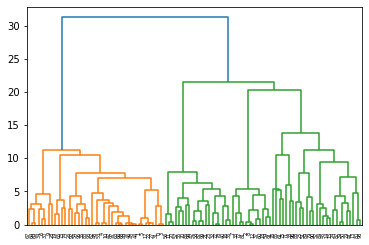

In [20]:
#Ward
plot_dendrogram(clustering_w)

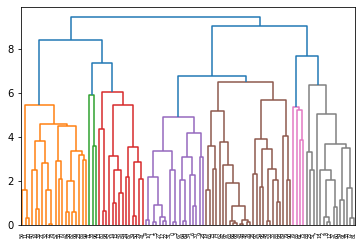

In [21]:
#complete
plot_dendrogram(clustering_c)

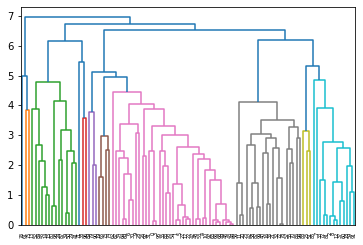

In [22]:
#average
plot_dendrogram(clustering_a)

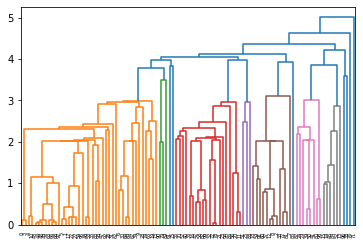

In [23]:
#single
plot_dendrogram(clustering_s)

### DBSCAN

A célula a seguir cria o dataset utilizado nesse exercício

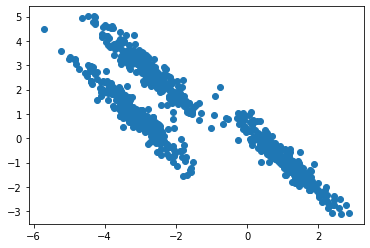

In [24]:
random_state = 170
X, y = datasets.make_blobs(n_samples=750, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
dataset = np.dot(X, transformation)

# Mostrar os dados
plt.scatter(dataset[:,0], dataset[:,1])
plt.show()

#### Clusterize os dados usando clusterização Hierárquica e plot novamente os pontos com cores diferentes para cada cluster

In [25]:
## code here

In [26]:
ch = AgglomerativeClustering(linkage='complete',affinity='manhattan' ,n_clusters=3).fit(dataset) 

[Link para a função a seguir, retirada do scikit learn.](https://scikit-learn.org/stable/auto_examples/cluster/plot_digits_linkage.html#sphx-glr-auto-examples-cluster-plot-digits-linkage-py)

In [27]:
#Código retirado do scikit learn a referencia para o site está na célula de texto acima
def plot_clustering(X_red, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for i in range(X_red.shape[0]):
        plt.text(X_red[i, 0], X_red[i, 1], str(y[i]),
                 color=plt.cm.nipy_spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

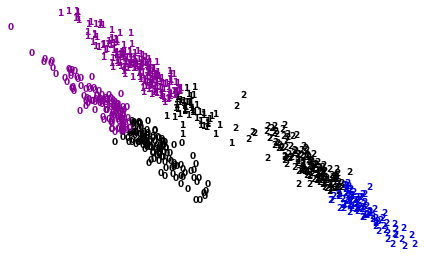

In [28]:
plot_clustering(dataset, ch.labels_)

#### Clusterize os dados usando o algoritmo DBSCAN e plot novamente os pontos com cores diferentes para cada cluster
> https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

In [29]:
## code here
db = DBSCAN(eps=0.4, min_samples=10).fit(dataset)

Estimated number of clusters: 3
Estimated number of noise points: 17
Homogeneity: 0.971
Completeness: 0.902
V-measure: 0.935
Adjusted Rand Index: 0.962
Adjusted Mutual Information: 0.935
Silhouette Coefficient: 0.681


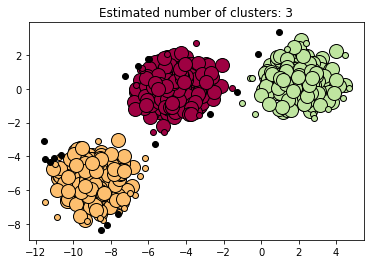

In [30]:
#Código retirado do scikit learn a referencia para o site está na célula de texto acima
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(y, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

#### O que vocêobservou nos resultados comparando os diferentes algoritmos?

O DBSCAN reproduziu de forma mais fidedigna e separou os dados nos clusters o mais corretamente possivel.